### <html><div align='center'> CrymeClassifiers Hyperparameter Tuning / Minor Feature Engineering
   </div></html>

In [1]:
from datetime import datetime, timedelta
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from utils import assign_coordinate_to_lon_box, assign_coordinate_to_lat_box
import numpy as np

In [2]:
ts_start = str(datetime(year=2018, month=4, day=30))
ts_end = str(datetime(year=2019, month=4, day=1))

In [3]:
data = pd.read_csv('/home/ben/.envs/cc/CrymeClarity/crymepipelines/src/tmp/complete_dataset.csv')
data['hour'] = data['time_minutes'].apply(lambda x: round(x/60))
train_ds = data[(data.timestamp > ts_start) & (data.timestamp < ts_end)]
test_ds = data[(data.timestamp > ts_end)]

features = ['longitude', 'latitude', 'time_minutes']

##### Theft  CC

Our three parameters will be max_depth, learning_rate and num_leaves. Lets take the greedy approach to tuning them.

In [253]:
target = 'n_t'

In [92]:
tuning = {
    'max_depth': list(range(2,11)),
    'learning_rate': np.linspace(0.001,1, 10),
    'num_leaves': list(range(10,200, 10)),
}
use_vals = {
    'max_depth': tuning['max_depth'][0],
    "objective": "binary",
    "boosting_type": "gbdt",
    "learning_rate": tuning['learning_rate'][0],
    "num_leaves": tuning['num_leaves'][0]

}
final = []
for iter_n in range(0, 3):
    lls = []
    trial_settings = []
    print(iter_n)
    for param in tuning:
        for comp in tuning[param]:
            test_params = use_vals.copy()
            test_params[param] = comp
            print(test_params)
            rfc = LGBMClassifier(**test_params)
            rfc.fit(train_ds[features], train_ds[target])
            y_est = rfc.predict_proba(test_ds[features])
            lls.append(log_loss(test_ds[target], y_est))
            trial_settings.append(test_params)
    use_vals = trial_settings[lls.index(min(lls))]
    print('settling on ..')
    print(use_vals)
    final.append(min(lls))


0
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.778, 'num_leaves': 100}
{'max_depth': 3, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.778, 'num_leaves': 100}
{'max_depth': 4, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.778, 'num_leaves': 100}
{'max_depth': 5, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.778, 'num_leaves': 100}
{'max_depth': 6, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.778, 'num_leaves': 100}
{'max_depth': 7, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.778, 'num_leaves': 100}
{'max_depth': 8, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.778, 'num_leaves': 100}
{'max_depth': 9, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.778, 'num_leaves': 100}
{'max_depth': 10, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.778, 'num_leaves': 100}
{'max_depth': 2, 'objecti

settling on ..
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.778, 'num_leaves': 80}
2
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.778, 'num_leaves': 80}
{'max_depth': 3, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.778, 'num_leaves': 80}
{'max_depth': 4, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.778, 'num_leaves': 80}
{'max_depth': 5, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.778, 'num_leaves': 80}


KeyboardInterrupt: 

In [93]:
print(final[1], use_vals)

0.012238073244170559 {'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.778, 'num_leaves': 80}


In [254]:
params = {
    'max_depth': 2, 
    'objective': 'binary', 
    'boosting_type': 'gbdt', 
    'learning_rate': 0.778, 
    'num_leaves': 80
}

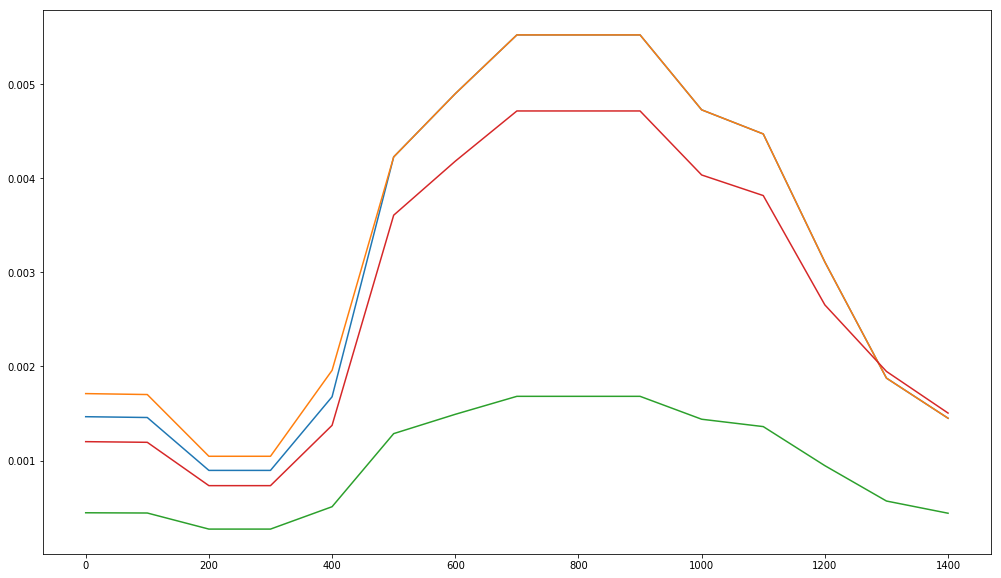

In [255]:
rfc = LGBMClassifier(**params)
rfc.fit(train_ds[features], train_ds[target])
plt.figure(figsize=(17,10))
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.064540, -118.437803, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.062533, -118.445334, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.067404, -118.433251, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.0762515879397, -118.37382875376885, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)


In [263]:
grid[650][510]

[33.94222754854855, -118.40541962162162, 800]

In [260]:
max(im[650])

0.07620450535701632

In [265]:
rfc.predict_proba(np.array([[34.101607, -118.332421, 800]]))

array([[0.970176, 0.029824]])

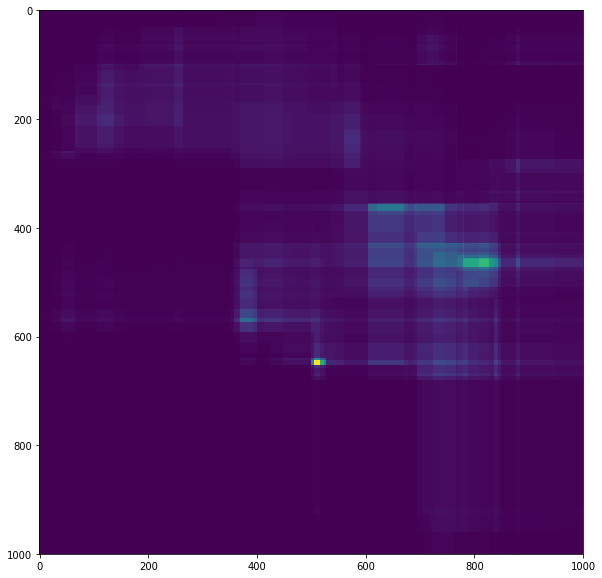

In [256]:
lons = np.linspace(34.300779,33.749713, 1000)
lats = np.linspace(-118.666218, -118.155360, 1000)
grid = []
for lon in lons:
    row  = []
    for lat in lats:
        row.append([lon, lat, 800])
    grid.append(row)
im = []
for row in grid:
    im.append(rfc.predict_proba(np.array(row))[:,1])
    
plt.figure(figsize=(17,10))

plt.imshow((im - np.average(im))/np.sqrt(np.var(im)), interpolation='none')
plt.show()

#### Burglary CC

In [27]:
target = 'n_b'

In [28]:
tuning = {
    'max_depth': list(range(2,11)),
    'learning_rate': np.linspace(0.001,1, 10),
    'num_leaves': list(range(10,200, 10)),
}
use_vals = {
    'max_depth': tuning['max_depth'][0],
    "objective": "binary",
    "boosting_type": "gbdt",
    "learning_rate": tuning['learning_rate'][0],
    "num_leaves": tuning['num_leaves'][0]

}
final = []
for iter_n in range(0, 3):
    lls = []
    trial_settings = []
    for param in tuning:
        for comp in tuning[param]:
            test_params = use_vals.copy()
            test_params[param] = comp
            print(test_params)
            rfc = LGBMClassifier(**test_params)
            rfc.fit(train_ds[features], train_ds[target])
            y_est = rfc.predict_proba(test_ds[features])
            lls.append(log_loss(test_ds[target], y_est))
            trial_settings.append(test_params)
    use_vals = trial_settings[lls.index(min(lls))]
    print('settling on ..')
    print(use_vals)
    final.append(min(lls))


{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 3, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 4, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 5, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 6, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 7, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 8, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 9, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 10, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 2, 'objective': 'binar

settling on ..
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.445, 'num_leaves': 10}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.445, 'num_leaves': 10}
{'max_depth': 3, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.445, 'num_leaves': 10}
{'max_depth': 4, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.445, 'num_leaves': 10}
{'max_depth': 5, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.445, 'num_leaves': 10}
{'max_depth': 6, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.445, 'num_leaves': 10}
{'max_depth': 7, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.445, 'num_leaves': 10}
{'max_depth': 8, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.445, 'num_leaves': 10}
{'max_depth': 9, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.445, 'num_leaves': 10}
{'max_depth': 10, 'obj

In [29]:
print(final[1], use_vals)

0.007909138910442133 {'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.445, 'num_leaves': 10}


In [34]:
params = {
    'max_depth': 2,
    "objective": "binary",
    "boosting_type": "gbdt",
    "learning_rate": .445,
    "num_leaves": 10,
}

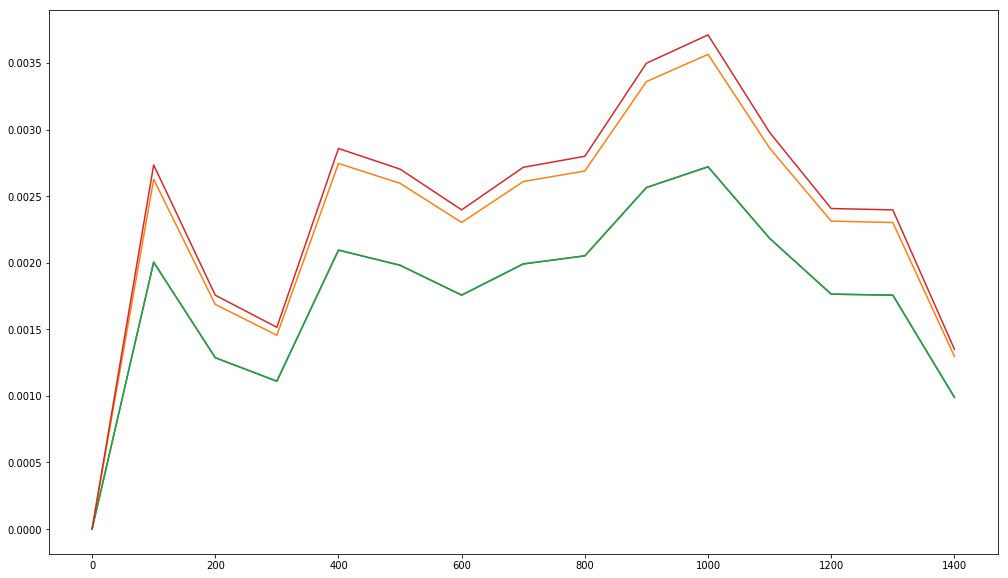

In [35]:
rfc = LGBMClassifier(**params)
rfc.fit(train_ds[features], train_ds[target])
plt.figure(figsize=(17,10))
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.064540, -118.437803, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.062533, -118.445334, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.067404, -118.433251, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.0762515879397, -118.37382875376885, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)


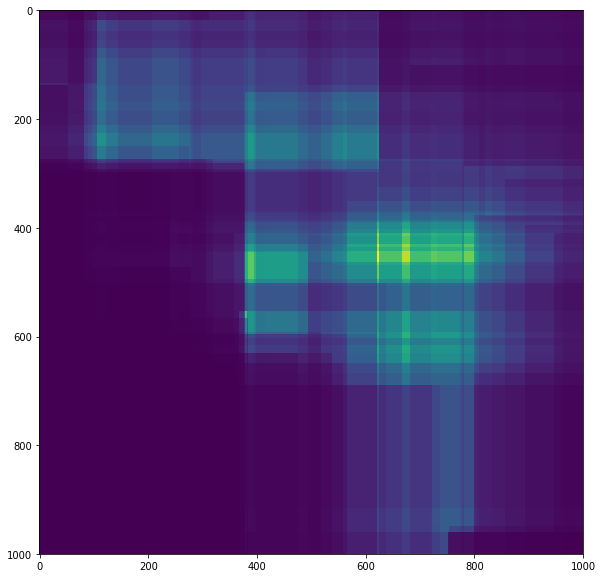

In [36]:
lons = np.linspace(34.300779,33.749713, 1000)
lats = np.linspace(-118.666218, -118.155360, 1000)
grid = []
for lon in lons:
    row  = []
    for lat in lats:
        row.append([lon, lat, 800])
    grid.append(row)
im = []
for row in grid:
    im.append(rfc.predict_proba(np.array(row))[:,1])
    
plt.figure(figsize=(17,10))

plt.imshow((im - np.average(im))/np.sqrt(np.var(im)), interpolation='none')
plt.show()

#### Assault / Battery CC

In [40]:
target = 'n_ab'

In [127]:
tuning = {
    'max_depth': list(range(2,11)),
    'learning_rate': np.linspace(0.001,1, 10),
    'num_leaves': list(range(10,200, 10)),
}
use_vals = {
    'max_depth': tuning['max_depth'][0],
    "objective": "binary",
    "boosting_type": "gbdt",
    "learning_rate": tuning['learning_rate'][0],
    "num_leaves": tuning['num_leaves'][0]

}
final = []
for iter_n in range(0, 3):
    lls = []
    trial_settings = []
    for param in tuning:
        for comp in tuning[param]:
            test_params = use_vals.copy()
            test_params[param] = comp
            print(test_params)
            rfc = LGBMClassifier(**test_params)
            rfc.fit(train_ds[features], train_ds[target])
            y_est = rfc.predict_proba(test_ds[features])
            lls.append(log_loss(test_ds[target], y_est))
            trial_settings.append(test_params)
    use_vals = trial_settings[lls.index(min(lls))]
    print('settling on ..')
    print(use_vals)
    final.append(min(lls))


{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 3, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 4, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 5, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 6, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 7, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 8, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 9, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 10, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 2, 'objective': 'binar

settling on ..
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 1.0, 'num_leaves': 30}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 1.0, 'num_leaves': 30}
{'max_depth': 3, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 1.0, 'num_leaves': 30}
{'max_depth': 4, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 1.0, 'num_leaves': 30}
{'max_depth': 5, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 1.0, 'num_leaves': 30}
{'max_depth': 6, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 1.0, 'num_leaves': 30}
{'max_depth': 7, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 1.0, 'num_leaves': 30}
{'max_depth': 8, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 1.0, 'num_leaves': 30}
{'max_depth': 9, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 1.0, 'num_leaves': 30}
{'max_depth': 10, 'objective': 'binary',

In [128]:
print(final[1], use_vals)

0.015835346483756355 {'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 1.0, 'num_leaves': 20}


In [41]:
params = {
    'max_depth': 2,
    "objective": "binary",
    "boosting_type": "gbdt",
    "learning_rate": 1.0,
    "num_leaves": 30,
}

In [42]:
rfc = LGBMClassifier(**params)
rfc.fit(train_ds[features], train_ds[target])
y_est = rfc.predict_proba(test_ds[features])

log_loss(test_ds[target], y_est)

0.015835346483756355

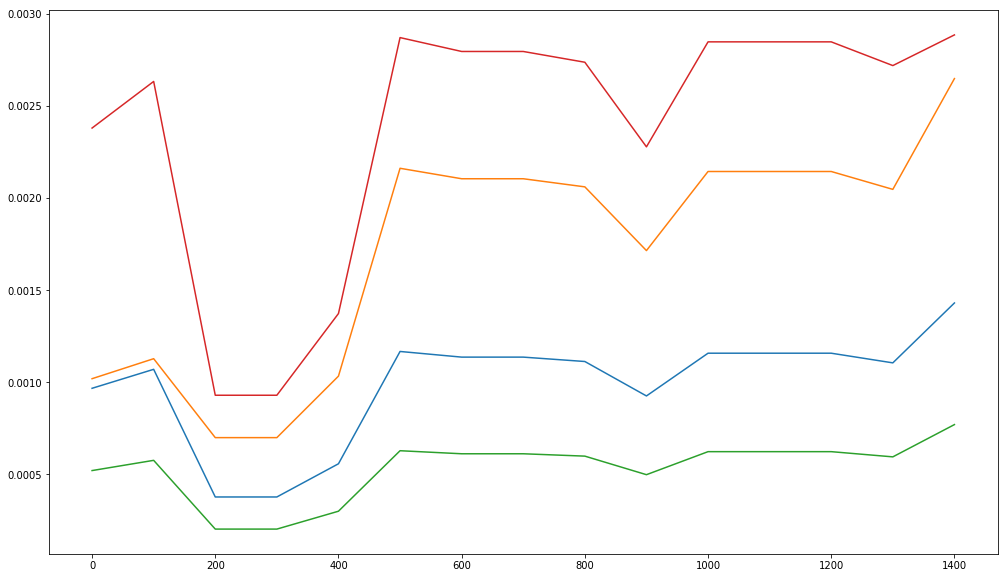

In [43]:
rfc = LGBMClassifier(**params)
rfc.fit(train_ds[features], train_ds[target])
plt.figure(figsize=(17,10))
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.064540, -118.437803, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.062533, -118.445334, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.067404, -118.433251, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.0762515879397, -118.37382875376885, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)


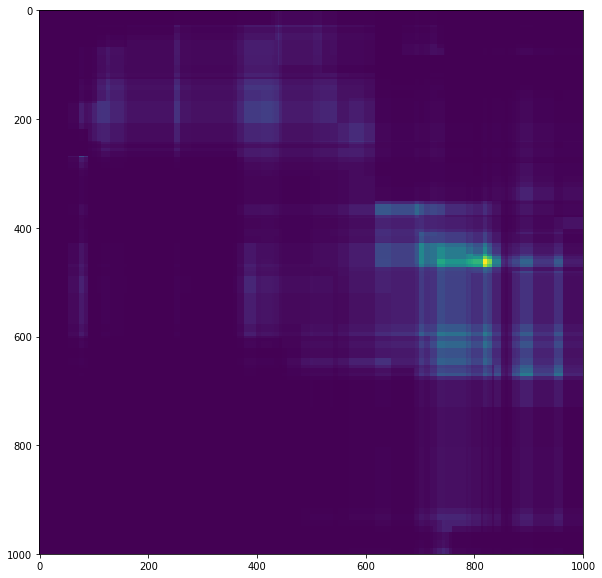

In [44]:
lons = np.linspace(34.300779,33.749713, 1000)
lats = np.linspace(-118.666218, -118.155360, 1000)
grid = []
for lon in lons:
    row  = []
    for lat in lats:
        row.append([lon, lat, 800])
    grid.append(row)
im = []
for row in grid:
    im.append(rfc.predict_proba(np.array(row))[:,1])
    
plt.figure(figsize=(17,10))

plt.imshow((im - np.average(im))/np.sqrt(np.var(im)), interpolation='none')
plt.show()

#### Life-Threatening Violent Crime CC

In [157]:
target = 'n_ltvc'

In [158]:
tuning = {
    'max_depth': list(range(2,11)),
    'learning_rate': np.linspace(0.001,1, 10),
    'num_leaves': list(range(10,200, 10)),
}
use_vals = {
    'max_depth': tuning['max_depth'][0],
    "objective": "binary",
    "boosting_type": "gbdt",
    "learning_rate": tuning['learning_rate'][0],
    "num_leaves": tuning['num_leaves'][0]

}
final = []
for iter_n in range(0, 3):
    lls = []
    trial_settings = []
    for param in tuning:
        for comp in tuning[param]:
            test_params = use_vals.copy()
            test_params[param] = comp
            print(test_params)
            rfc = LGBMClassifier(**test_params)
            rfc.fit(train_ds[features], train_ds[target])
            y_est = rfc.predict_proba(test_ds[features])
            lls.append(log_loss(test_ds[target], y_est))
            trial_settings.append(test_params)
    use_vals = trial_settings[lls.index(min(lls))]
    print('settling on ..')
    print(use_vals)
    final.append(min(lls))


{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 3, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 4, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 5, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 6, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 7, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 8, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 9, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 10, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 2, 'objective': 'binar

settling on ..
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.445, 'num_leaves': 10}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.445, 'num_leaves': 10}
{'max_depth': 3, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.445, 'num_leaves': 10}
{'max_depth': 4, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.445, 'num_leaves': 10}
{'max_depth': 5, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.445, 'num_leaves': 10}
{'max_depth': 6, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.445, 'num_leaves': 10}
{'max_depth': 7, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.445, 'num_leaves': 10}
{'max_depth': 8, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.445, 'num_leaves': 10}
{'max_depth': 9, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.445, 'num_leaves': 10}
{'max_depth': 10, 'obj

KeyboardInterrupt: 

In [ ]:
print(final[1], use_vals)

In [159]:
params = {
    'max_depth': 2,
    "objective": "binary",
    "boosting_type": "gbdt",
    "learning_rate": 0.445,
    "num_leaves": 10,
}

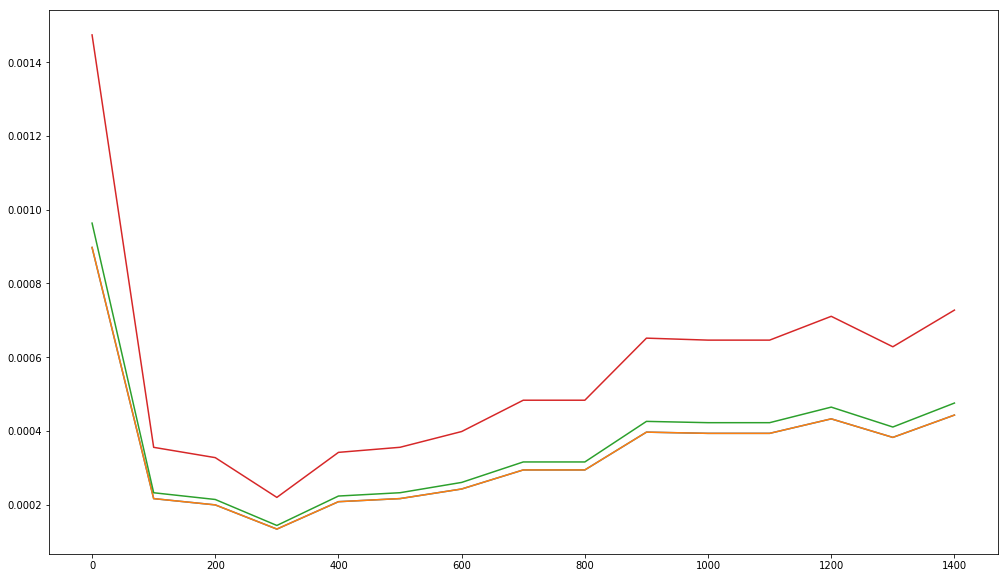

In [160]:
rfc = LGBMClassifier(**params)
rfc.fit(train_ds[features], train_ds[target])
plt.figure(figsize=(17,10))
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.064540, -118.437803, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.062533, -118.445334, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.067404, -118.433251, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.0762515879397, -118.37382875376885, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)


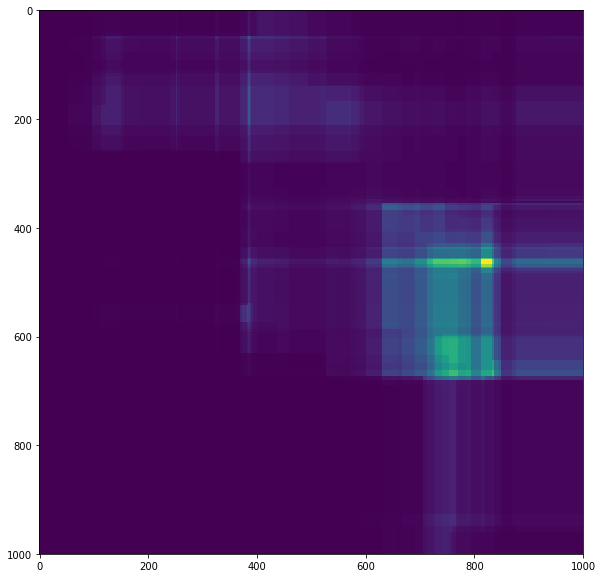

In [174]:
lons = np.linspace(34.300779,33.749713, 1000)
lats = np.linspace(-118.666218, -118.155360, 1000)
grid = []
for lon in lons:
    row  = []
    for lat in lats:
        row.append([lon, lat, 800])
    grid.append(row)
im = []
for row in grid:
    im.append(rfc.predict_proba(np.array(row))[:,1])
    
plt.figure(figsize=(17,10))

plt.imshow((im - np.average(im))/np.sqrt(np.var(im)), interpolation='none')
plt.show()

#### Shoplifting / Pickpocketing CC

In [88]:
target = 'n_sp'

In [177]:
tuning = {
    'max_depth': list(range(2,11)),
    'learning_rate': np.linspace(0.001,1, 10),
    'num_leaves': list(range(10,200, 10)),
}
use_vals = {
    'max_depth': tuning['max_depth'][0],
    "objective": "binary",
    "boosting_type": "gbdt",
    "learning_rate": tuning['learning_rate'][0],
    "num_leaves": tuning['num_leaves'][0]

}
final = []
for iter_n in range(0, 3):
    lls = []
    trial_settings = []
    for param in tuning:
        for comp in tuning[param]:
            test_params = use_vals.copy()
            test_params[param] = comp
            print(test_params)
            rfc = LGBMClassifier(**test_params)
            rfc.fit(train_ds[features], train_ds[target])
            y_est = rfc.predict_proba(test_ds[features])
            lls.append(log_loss(test_ds[target], y_est))
            trial_settings.append(test_params)
    use_vals = trial_settings[lls.index(min(lls))]
    print('settling on ..')
    print(use_vals)
    final.append(min(lls))


{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 3, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 4, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 5, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 6, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 7, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 8, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 9, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 10, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 2, 'objective': 'binar

settling on ..
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.889, 'num_leaves': 10}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.889, 'num_leaves': 10}
{'max_depth': 3, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.889, 'num_leaves': 10}
{'max_depth': 4, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.889, 'num_leaves': 10}
{'max_depth': 5, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.889, 'num_leaves': 10}
{'max_depth': 6, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.889, 'num_leaves': 10}
{'max_depth': 7, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.889, 'num_leaves': 10}
{'max_depth': 8, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.889, 'num_leaves': 10}
{'max_depth': 9, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.889, 'num_leaves': 10}
{'max_depth': 10, 'obj

In [ ]:
print(final[1], use_vals)

In [89]:
params = {
    'max_depth': 2,
    "objective": "binary",
    "boosting_type": "gbdt",
    "learning_rate": 0.889,
    "num_leaves": 20,
}

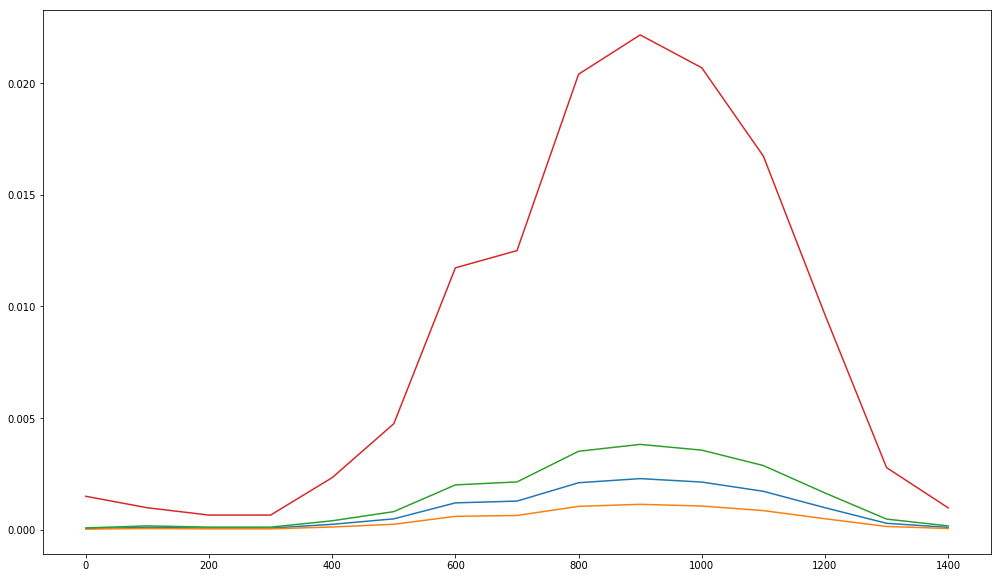

In [97]:
rfc = LGBMClassifier(**params)
rfc.fit(train_ds[features], train_ds[target])
plt.figure(figsize=(17,10))
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.064540, -118.437803, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.062533, -118.445334, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.056955, -118.419148, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.0762515879397, -118.37382875376885, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)


In [105]:
grid[100][400]

[34.06236516516517, -118.41915206206207, 1400]

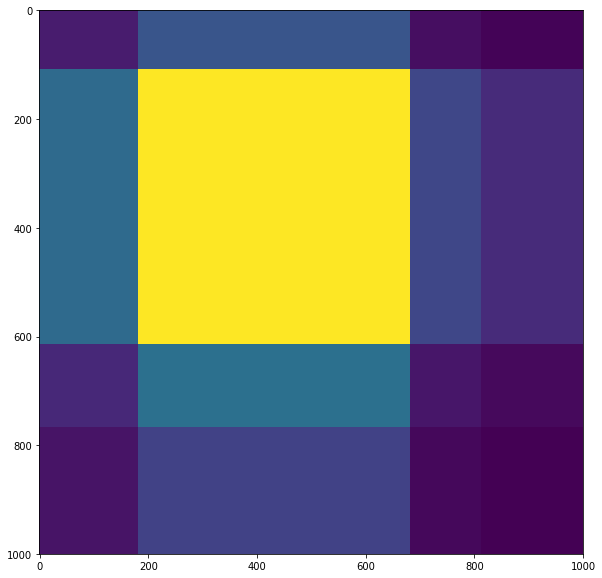

In [102]:
lons = np.linspace(34.063200,34.054860, 1000)
lats = np.linspace(-118.423490, -118.412656, 1000)
grid = []
for lon in lons:
    row  = []
    for lat in lats:
        row.append([lon, lat, 1400])
    grid.append(row)
im = []
for row in grid:
    im.append(rfc.predict_proba(np.array(row))[:,1])
    
plt.figure(figsize=(17,10))

plt.imshow((im - np.average(im))/np.sqrt(np.var(im)), interpolation='none')
plt.show()

#### Vehicle/Bike/Boat Stolen CC

In [229]:
target = 'n_vbbs'

In [230]:
tuning = {
    'max_depth': list(range(2,11)),
    'learning_rate': np.linspace(0.001,1, 10),
    'num_leaves': list(range(10,200, 10)),
}
use_vals = {
    'max_depth': tuning['max_depth'][0],
    "objective": "binary",
    "boosting_type": "gbdt",
    "learning_rate": tuning['learning_rate'][0],
    "num_leaves": tuning['num_leaves'][0]

}
final = []
for iter_n in range(0, 3):
    lls = []
    trial_settings = []
    for param in tuning:
        for comp in tuning[param]:
            test_params = use_vals.copy()
            test_params[param] = comp
            print(test_params)
            rfc = LGBMClassifier(**test_params)
            rfc.fit(train_ds[features], train_ds[target])
            y_est = rfc.predict_proba(test_ds[features])
            lls.append(log_loss(test_ds[target], y_est))
            trial_settings.append(test_params)
    use_vals = trial_settings[lls.index(min(lls))]
    print('settling on ..')
    print(use_vals)
    final.append(min(lls))


{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 3, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 4, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 5, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 6, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 7, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 8, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 9, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 10, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 2, 'objective': 'binar

settling on ..
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 1.0, 'num_leaves': 120}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 1.0, 'num_leaves': 120}
{'max_depth': 3, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 1.0, 'num_leaves': 120}
{'max_depth': 4, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 1.0, 'num_leaves': 120}
{'max_depth': 5, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 1.0, 'num_leaves': 120}
{'max_depth': 6, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 1.0, 'num_leaves': 120}
{'max_depth': 7, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 1.0, 'num_leaves': 120}
{'max_depth': 8, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 1.0, 'num_leaves': 120}
{'max_depth': 9, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 1.0, 'num_leaves': 120}
{'max_depth': 10, 'objective': 

In [231]:
print(final[1], use_vals)

0.010201123658050948 {'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 1.0, 'num_leaves': 160}


In [232]:
params = {
    'max_depth': 2,
    "objective": "binary",
    "boosting_type": "gbdt",
    "learning_rate": 1.0,
    "num_leaves": 160,
}

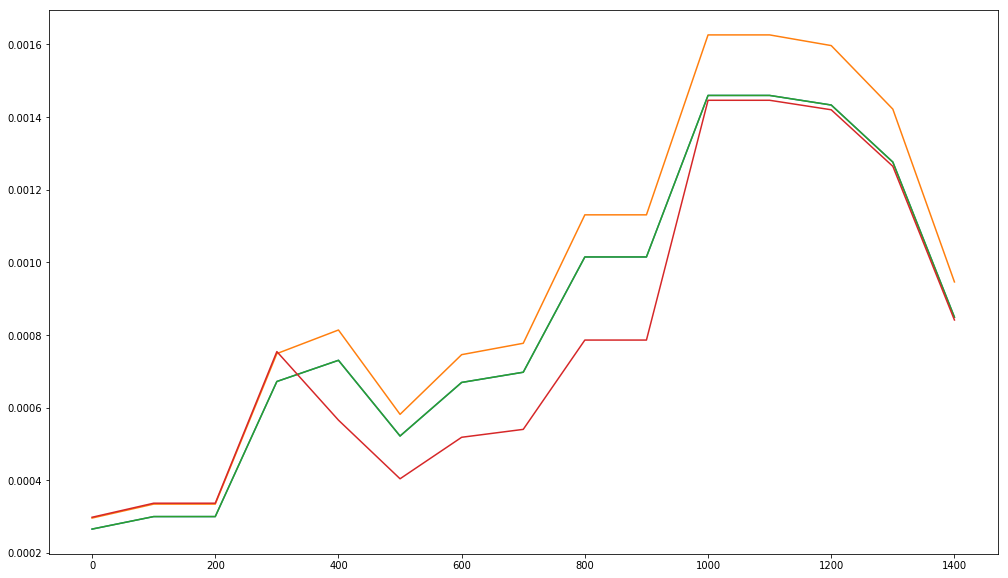

In [233]:
rfc = LGBMClassifier(**params)
rfc.fit(train_ds[features], train_ds[target])
plt.figure(figsize=(17,10))
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.064540, -118.437803, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.062533, -118.445334, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.067404, -118.433251, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.0762515879397, -118.37382875376885, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)


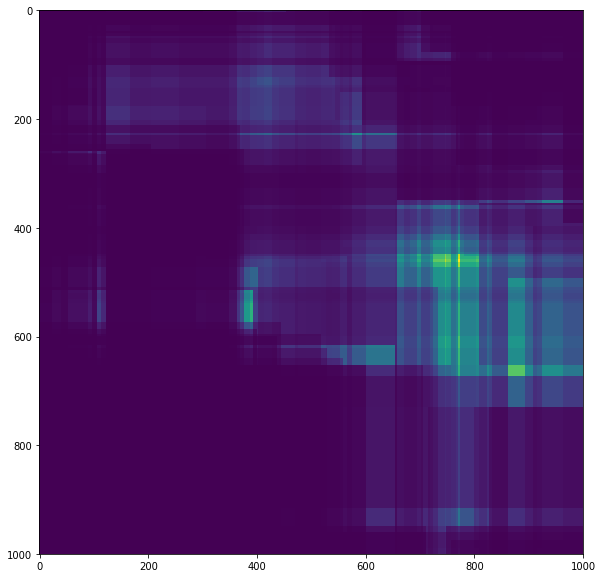

In [234]:
lons = np.linspace(34.300779,33.749713, 1000)
lats = np.linspace(-118.666218, -118.155360, 1000)
grid = []
for lon in lons:
    row  = []
    for lat in lats:
        row.append([lon, lat, 800])
    grid.append(row)
im = []
for row in grid:
    im.append(rfc.predict_proba(np.array(row))[:,1])
    
plt.figure(figsize=(17,10))

plt.imshow((im - np.average(im))/np.sqrt(np.var(im)), interpolation='none')
plt.show()

#### Property Damage / Threats CC

In [239]:
target = 'n_pdt'

In [240]:
tuning = {
    'max_depth': list(range(2,11)),
    'learning_rate': np.linspace(0.001,1.3, 12),
    'num_leaves': list(range(10,200, 10)),
}
use_vals = {
    'max_depth': tuning['max_depth'][0],
    "objective": "binary",
    "boosting_type": "gbdt",
    "learning_rate": tuning['learning_rate'][0],
    "num_leaves": tuning['num_leaves'][0]

}
final = []
for iter_n in range(0, 3):
    lls = []
    trial_settings = []
    for param in tuning:
        for comp in tuning[param]:
            test_params = use_vals.copy()
            test_params[param] = comp
            print(test_params)
            rfc = LGBMClassifier(**test_params)
            rfc.fit(train_ds[features], train_ds[target])
            y_est = rfc.predict_proba(test_ds[features])
            lls.append(log_loss(test_ds[target], y_est))
            trial_settings.append(test_params)
    use_vals = trial_settings[lls.index(min(lls))]
    print('settling on ..')
    print(use_vals)
    final.append(min(lls))


{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 3, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 4, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 5, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 6, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 7, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 8, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 9, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 10, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 2, 'objective': 'binar

{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.9457272727272729, 'num_leaves': 110}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.9457272727272729, 'num_leaves': 120}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.9457272727272729, 'num_leaves': 130}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.9457272727272729, 'num_leaves': 140}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.9457272727272729, 'num_leaves': 150}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.9457272727272729, 'num_leaves': 160}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.9457272727272729, 'num_leaves': 170}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.9457272727272729, 'num_leaves': 180}
{'max_depth': 2, 'objective': 'b

In [ ]:
print(final[1], use_vals)

In [241]:
params = {
    'max_depth': 2,
    "objective": "binary",
    "boosting_type": "gbdt",
    "learning_rate": 0.47336,
    "num_leaves": 10,
}

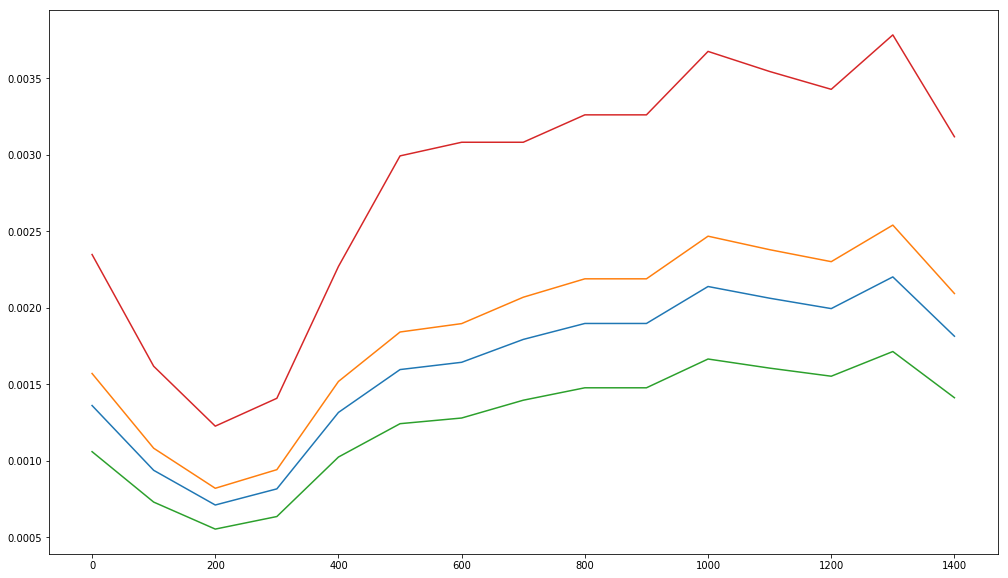

In [242]:
rfc = LGBMClassifier(**params)
rfc.fit(train_ds[features], train_ds[target])
plt.figure(figsize=(17,10))
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.064540, -118.437803, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.062533, -118.445334, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.067404, -118.433251, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.0762515879397, -118.37382875376885, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)


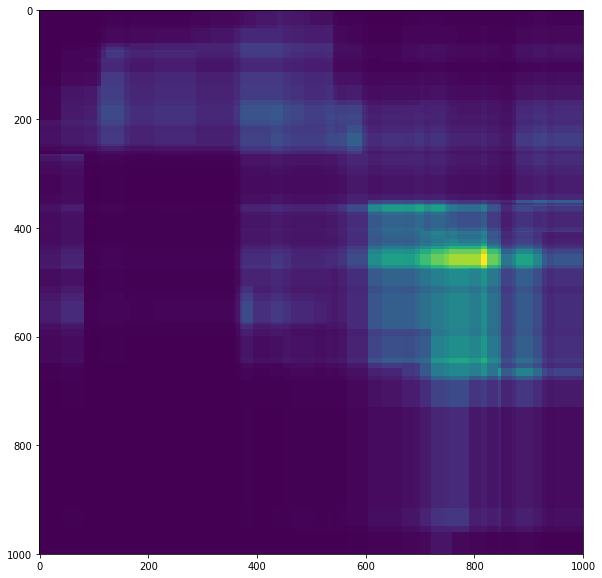

In [243]:
lons = np.linspace(34.300779,33.749713, 1000)
lats = np.linspace(-118.666218, -118.155360, 1000)
grid = []
for lon in lons:
    row  = []
    for lat in lats:
        row.append([lon, lat, 800])
    grid.append(row)
im = []
for row in grid:
    im.append(rfc.predict_proba(np.array(row))[:,1])
    
plt.figure(figsize=(17,10))

plt.imshow((im - np.average(im))/np.sqrt(np.var(im)), interpolation='none')
plt.show()

#### Burglary / Theft From Vehicle CC

In [6]:
target = 'n_btv'

In [246]:
tuning = {
    'max_depth': list(range(2,11)),
    'learning_rate': np.linspace(0.001,1.3, 12),
    'num_leaves': list(range(10,200, 10)),
}
use_vals = {
    'max_depth': tuning['max_depth'][0],
    "objective": "binary",
    "boosting_type": "gbdt",
    "learning_rate": tuning['learning_rate'][0],
    "num_leaves": tuning['num_leaves'][0]

}
final = []
for iter_n in range(0, 3):
    lls = []
    trial_settings = []
    for param in tuning:
        for comp in tuning[param]:
            test_params = use_vals.copy()
            test_params[param] = comp
            print(test_params)
            rfc = LGBMClassifier(**test_params)
            rfc.fit(train_ds[features], train_ds[target])
            y_est = rfc.predict_proba(test_ds[features])
            lls.append(log_loss(test_ds[target], y_est))
            trial_settings.append(test_params)
    use_vals = trial_settings[lls.index(min(lls))]
    print('settling on ..')
    print(use_vals)
    final.append(min(lls))


{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 3, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 4, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 5, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 6, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 7, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 8, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 9, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 10, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 2, 'objective': 'binar

{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.47336363636363643, 'num_leaves': 110}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.47336363636363643, 'num_leaves': 120}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.47336363636363643, 'num_leaves': 130}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.47336363636363643, 'num_leaves': 140}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.47336363636363643, 'num_leaves': 150}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.47336363636363643, 'num_leaves': 160}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.47336363636363643, 'num_leaves': 170}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.47336363636363643, 'num_leaves': 180}
{'max_depth': 2, 'object

KeyboardInterrupt: 

In [247]:
print(final[1], use_vals)

0.015038227805149264 {'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.47336363636363643, 'num_leaves': 10}


In [53]:
params = {
    'max_depth': 2,
    "objective": "binary",
    "boosting_type": "gbdt",
    "learning_rate": 0.47336363636363643,
    "num_leaves": 10,
}

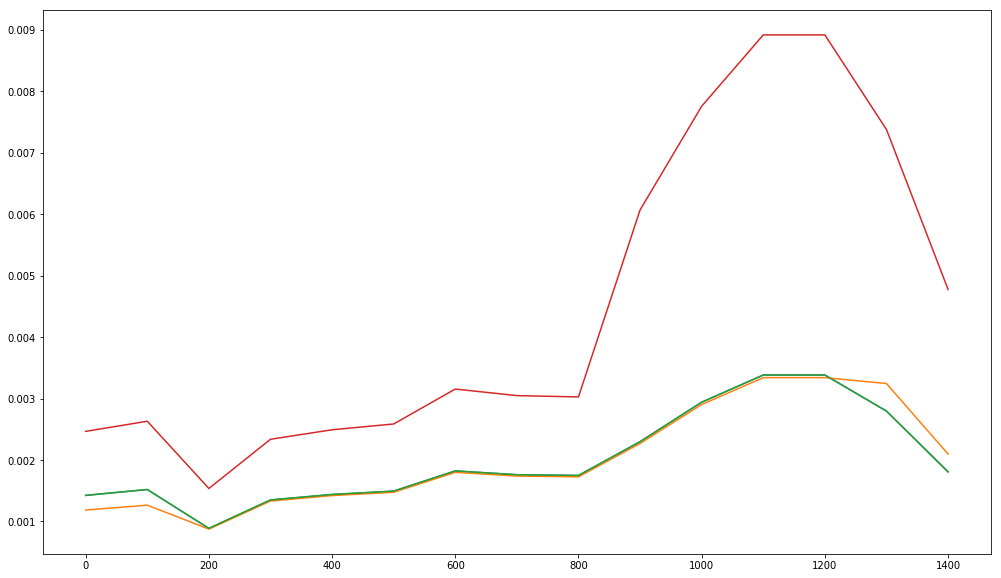

In [54]:
rfc = LGBMClassifier(**params)
rfc.fit(train_ds[features], train_ds[target])
plt.figure(figsize=(17,10))
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.064540, -118.437803, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.062533, -118.445334, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.067404, -118.433251, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.0762515879397, -118.37382875376885, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)


In [55]:
data[(data.latitude < -118.554528) & (data.longitude < 34.037846) & (data.n_btv>0)]

,id,latitude,longitude,timestamp,lat_bb,lon_bb,timestamp_unix,n_ab,n_b,n_t,n_btv,n_vbbs,n_pdt,n_ltvc,n_sp,n_mio,n_r,time_minutes,day_of_week,hour


In [56]:
grid[500][135]

[34.02497019119119, -118.59718313513514, 800]

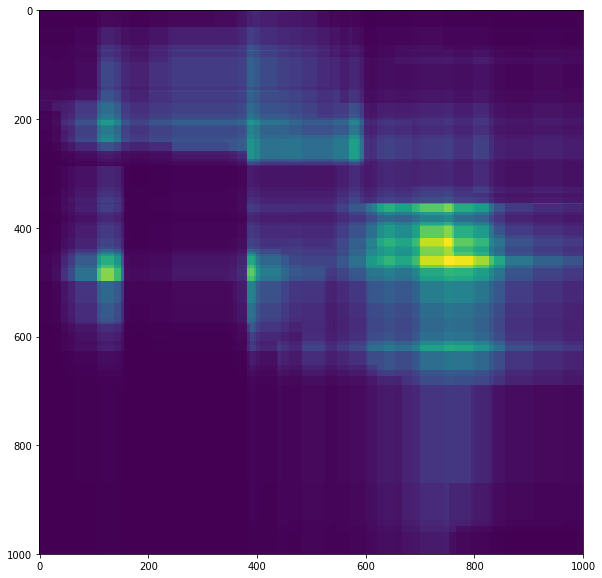

In [57]:
lons = np.linspace(34.300779,33.749713, 1000)
lats = np.linspace(-118.666218, -118.155360, 1000)
grid = []
for lon in lons:
    row  = []
    for lat in lats:
        row.append([lon, lat, 800])
    grid.append(row)
im = []
for row in grid:
    im.append(rfc.predict_proba(np.array(row))[:,1])
    
plt.figure(figsize=(17,10))

plt.imshow((im - np.average(im))/np.sqrt(np.var(im)), interpolation='none')
plt.show()

#### Misc. Infrequent Offenses CC

In [47]:
target = 'n_mio'

In [5]:
tuning = {
    'max_depth': list(range(2,11)),
    'learning_rate': np.linspace(0.001,1.3, 12),
    'num_leaves': list(range(10,200, 10)),
}
use_vals = {
    'max_depth': tuning['max_depth'][0],
    "objective": "binary",
    "boosting_type": "gbdt",
    "learning_rate": tuning['learning_rate'][0],
    "num_leaves": tuning['num_leaves'][0]

}
final = []
for iter_n in range(0, 3):
    lls = []
    trial_settings = []
    for param in tuning:
        for comp in tuning[param]:
            test_params = use_vals.copy()
            test_params[param] = comp
            print(test_params)
            rfc = LGBMClassifier(**test_params)
            rfc.fit(train_ds[features], train_ds[target])
            y_est = rfc.predict_proba(test_ds[features])
            lls.append(log_loss(test_ds[target], y_est))
            trial_settings.append(test_params)
    use_vals = trial_settings[lls.index(min(lls))]
    print('settling on ..')
    print(use_vals)
    final.append(min(lls))


{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 3, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 4, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 5, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 6, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 7, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 8, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 9, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 10, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 2, 'objective': 'binar

{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.3552727272727273, 'num_leaves': 110}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.3552727272727273, 'num_leaves': 120}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.3552727272727273, 'num_leaves': 130}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.3552727272727273, 'num_leaves': 140}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.3552727272727273, 'num_leaves': 150}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.3552727272727273, 'num_leaves': 160}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.3552727272727273, 'num_leaves': 170}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.3552727272727273, 'num_leaves': 180}
{'max_depth': 2, 'objective': 'b

KeyboardInterrupt: 

In [6]:
print(final[1], use_vals)

0.002117404481794647 {'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.3552727272727273, 'num_leaves': 10}


In [48]:
params = {
    'max_depth': 2,
    "objective": "binary",
    "boosting_type": "gbdt",
    "learning_rate": 0.355273,
    "num_leaves": 10,
}

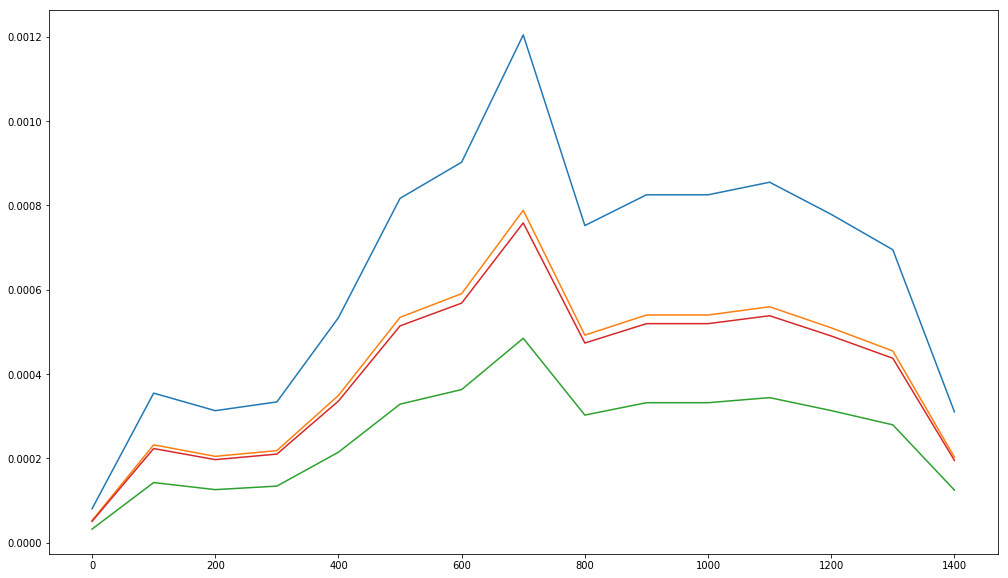

In [49]:
rfc = LGBMClassifier(**params)
rfc.fit(train_ds[features], train_ds[target])
plt.figure(figsize=(17,10))
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.064540, -118.437803, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.062533, -118.445334, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.067404, -118.433251, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.0762515879397, -118.37382875376885, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)


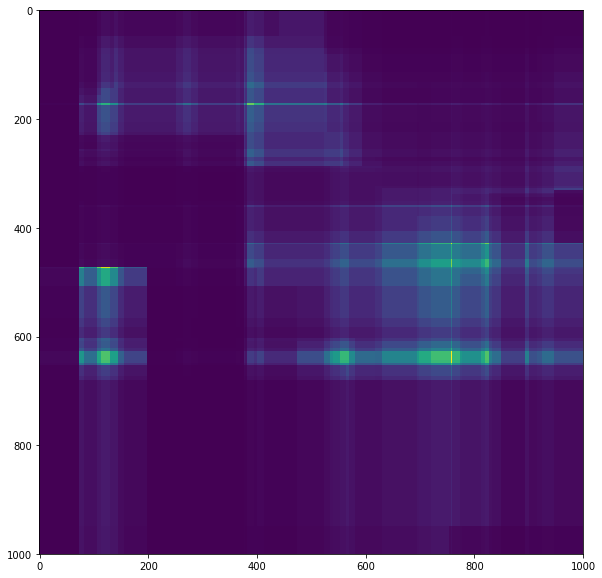

In [50]:
lons = np.linspace(34.300779,33.749713, 1000)
lats = np.linspace(-118.666218, -118.155360, 1000)
grid = []
for lon in lons:
    row  = []
    for lat in lats:
        row.append([lon, lat, 800])
    grid.append(row)
im = []
for row in grid:
    im.append(rfc.predict_proba(np.array(row))[:,1])
    
plt.figure(figsize=(17,10))

plt.imshow((im - np.average(im))/np.sqrt(np.var(im)), interpolation='none')
plt.show()

In [87]:
grid[650][115]

[33.94222754854855, -118.60741052252253, 800]

In [86]:
im[650][115]

0.0023076968125715887

#### Robbery (Violent Theft) CC

In [11]:
target = 'n_r'

In [12]:
tuning = {
    'max_depth': list(range(2,11)),
    'learning_rate': np.linspace(0.001,1.3, 12),
    'num_leaves': list(range(10,200, 10)),
}
use_vals = {
    'max_depth': tuning['max_depth'][0],
    "objective": "binary",
    "boosting_type": "gbdt",
    "learning_rate": tuning['learning_rate'][0],
    "num_leaves": tuning['num_leaves'][0]

}
final = []
for iter_n in range(0, 3):
    lls = []
    trial_settings = []
    for param in tuning:
        for comp in tuning[param]:
            test_params = use_vals.copy()
            test_params[param] = comp
            print(test_params)
            rfc = LGBMClassifier(**test_params)
            rfc.fit(train_ds[features], train_ds[target])
            y_est = rfc.predict_proba(test_ds[features])
            lls.append(log_loss(test_ds[target], y_est))
            trial_settings.append(test_params)
    use_vals = trial_settings[lls.index(min(lls))]
    print('settling on ..')
    print(use_vals)
    final.append(min(lls))


{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 3, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 4, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 5, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 6, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 7, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 8, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 9, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 10, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.001, 'num_leaves': 10}
{'max_depth': 2, 'objective': 'binar

{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.3552727272727273, 'num_leaves': 110}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.3552727272727273, 'num_leaves': 120}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.3552727272727273, 'num_leaves': 130}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.3552727272727273, 'num_leaves': 140}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.3552727272727273, 'num_leaves': 150}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.3552727272727273, 'num_leaves': 160}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.3552727272727273, 'num_leaves': 170}
{'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.3552727272727273, 'num_leaves': 180}
{'max_depth': 2, 'objective': 'b

KeyboardInterrupt: 

In [13]:
print(final[1], use_vals)

0.005290104523936168 {'max_depth': 2, 'objective': 'binary', 'boosting_type': 'gbdt', 'learning_rate': 0.3552727272727273, 'num_leaves': 10}


In [16]:
params = {
    'max_depth': 2,
    "objective": "binary",
    "boosting_type": "gbdt",
    "learning_rate": 0.355273,
    "num_leaves": 10,
}

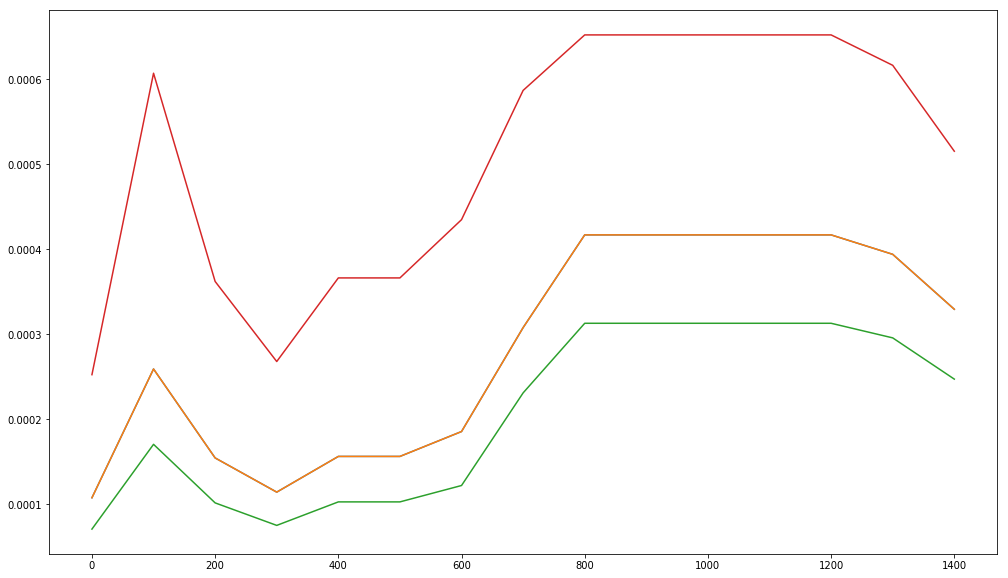

In [17]:
rfc = LGBMClassifier(**params)
rfc.fit(train_ds[features], train_ds[target])
plt.figure(figsize=(17,10))
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.064540, -118.437803, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.062533, -118.445334, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.067404, -118.433251, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)
tst = []
for i in range(0, 1440, 100):
    tst.append(rfc.predict_proba([[34.0762515879397, -118.37382875376885, i]])[0][1])
plt.plot(range(0, 1440, 100), tst)


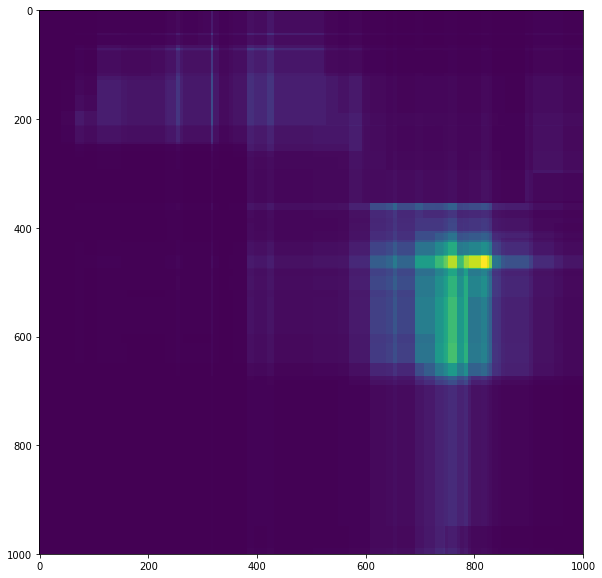

In [18]:
lons = np.linspace(34.300779,33.749713, 1000)
lats = np.linspace(-118.666218, -118.155360, 1000)
grid = []
for lon in lons:
    row  = []
    for lat in lats:
        row.append([lon, lat, 800])
    grid.append(row)
im = []
for row in grid:
    im.append(rfc.predict_proba(np.array(row))[:,1])
    
plt.figure(figsize=(17,10))

plt.imshow((im - np.average(im))/np.sqrt(np.var(im)), interpolation='none')
plt.show()